In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

# Allows me to draw the circuits I create in the Jupyter Notebook
%matplotlib inline
import math

In [3]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [4]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [5]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    # Getting the number of qubits in the circuit
    num_qubits = circuit.num_qubits
    
    # Measuring the state of each qubit
    # range(num_qubits) creates a list from 0 to num_qubits
    # measure(qubits, classical bits), classical bits is same as num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    # Creating the qasm executable but this time I'm specifying the number of shots
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [6]:
# QuantumCircuit(num qubits, num classical bits) creates a quantum circuit
circuit = QuantumCircuit(2, 2)
statevec, counts = run_on_simulators(circuit)

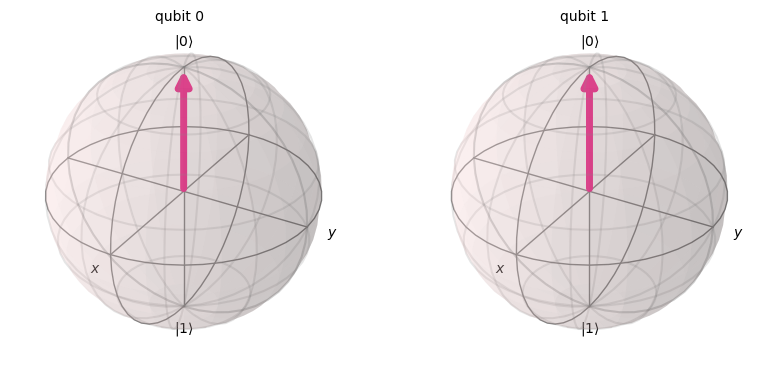

In [7]:
plot_bloch_multivector(statevec)

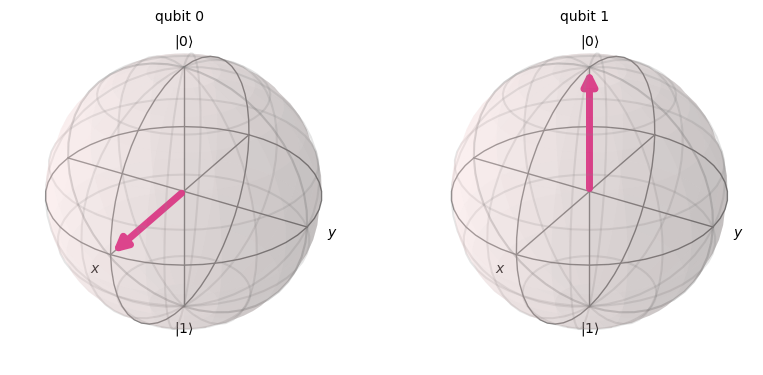

In [8]:
# Adds a hadamard gate to the qubit 0
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

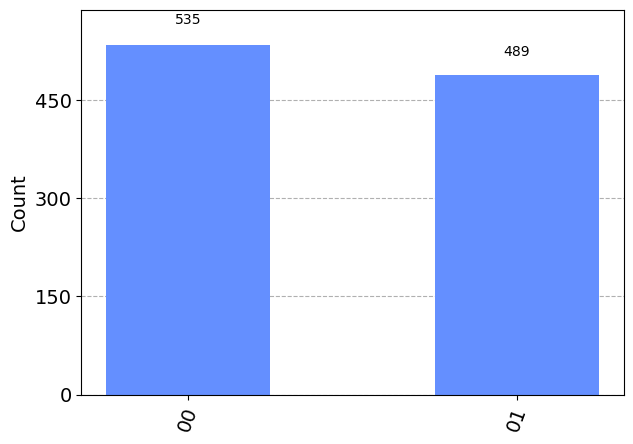

In [9]:
plot_histogram(counts)

The results make sense because the qubit 0, with the hadamard gate is supposed to have a 50% chance of being in either the 0 state or the 1 state. Qubit 1 has a 100% chance of being in the 0 state because it is not operated on by any gates.

Note that the state of qubit 0 is represented by the right number in 00 and 01 while the state of qubit 1 is represented by the left number.

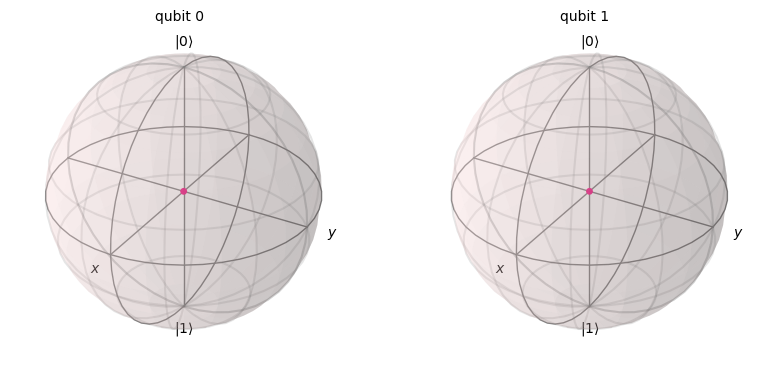

In [10]:
circuit.h(0)

# Adding a CNOT gate that is controlled by qubit 0 and targets qubit 1
circuit.cx(0, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

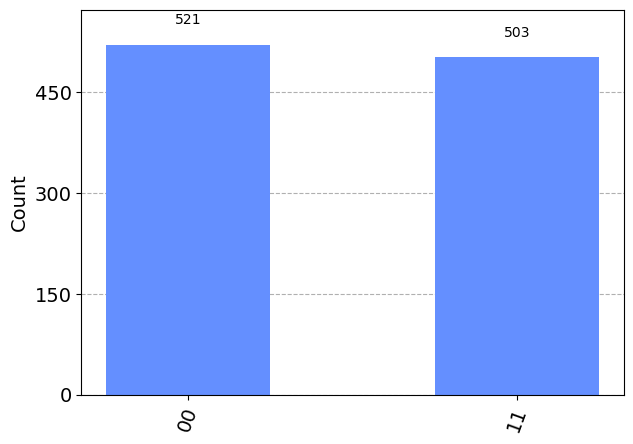

In [11]:
plot_histogram(counts)

This makes sense because whenever qubit 0's state is 1, qubit 1's state is switched from 0 to 1 so the final state is 11.